- title: Bessel's Correction
- slug: bessels-correction
- summary: Understand the significance of Bessel's correction in calculating sample variance and sample standard deviation; visualize the bias in using the population standard deviation equation for samples
- date: 2018-12-28 20:00  
- category: Math
- subcategory: Descriptive Statistics
- posttype: Article
- keywords: bessel's correction standard deviation python
- tags: bessel's correction, standard deviation, normal distribution, python, pandas
- authors: Dan Friedman

#### Import Modules

In [416]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

#### Visualization styling code

In [417]:
sns.set(rc={'figure.figsize':(12, 7.5)})
sns.set_context('talk')

### Sample Vs. Population Standard Deviation

**Standard deviation** is a measure of how spread out a set of values are from the mean.

You generally take a sample of data through a technique such as surveying to analyze statistics of the sample that you think would be representative of the population. If you have a dataset for the entire population, you don't need to calculate sample statistics.

With sampling, samples tend to underestimate variability of a population because if you're sampling from a normal distribution, you'll more likely to choose values centered around the mean and ignore the extremes.

#### Visualize Sampling Patterns from Population

In [418]:
np.random.seed(4) # seed random number generator with fixed value to always get same values below
normal_distr_values = list(np.random.normal(loc=100, scale=20, size=1300))

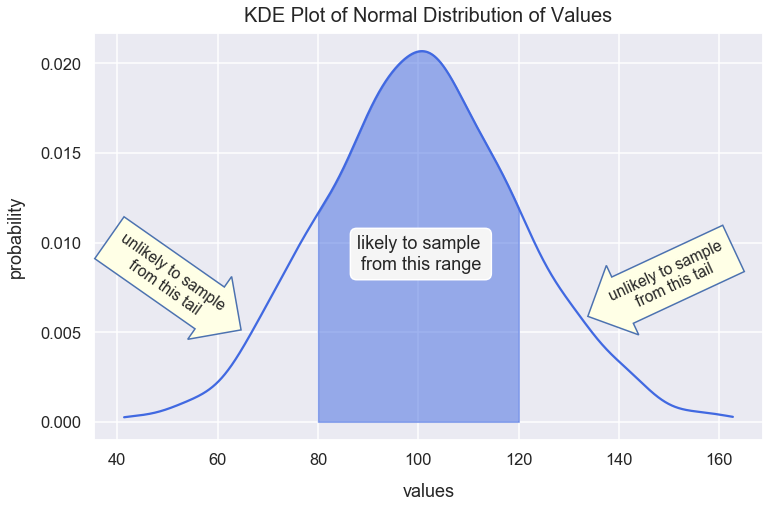

In [419]:
kde = stats.gaussian_kde(normal_distr_values)
pos = np.linspace(min(normal_distr_values), max(normal_distr_values), 50000)
plt.plot(pos, kde(pos), color='royalblue')
shade = np.linspace(80, 120, 300)
plt.fill_between(shade, kde(shade), alpha=0.5, color='royalblue',)
plt.text(x=100.5, y=.0085, horizontalalignment='center', fontsize=18, 
         s="likely to sample \nfrom this range", bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.35"))
bbox_props = dict(fc=(1, 1, 0.9), ec="b", lw=1.5)
left_tail_text = plt.text(50, 0.008, "unlikely to sample\n from this tail", ha="center", va="center", 
            rotation=325, size=15.5, bbox=bbox_props)
bb = left_tail_text.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.6)
right_tail_text = plt.text(150, 0.008, "unlikely to sample\n from this tail", ha="center", va="center", 
            rotation=25, size=15.5, bbox=bbox_props)
bb = right_tail_text.get_bbox_patch()
bb.set_boxstyle("larrow", pad=0.6)
plt.title("KDE Plot of Normal Distribution of Values", fontsize=20, y=1.012)
plt.xlabel("values", labelpad=15)
plt.ylabel("probability", labelpad=15);

#### Bessel's Correction

To correct for this issue with sampling from the middle area, **Bessel's correction** is the use of $n-1$ instead of $n$ in the formula for sample variance and sample standard deviation where $n$ is the number of observations in a sample. Below are the formulas for population standard deviation and sample standard deviation.

**Population standard deviation:**

$$ \sigma = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(x_{i}-\mu)^{2}} $$

- $\sigma$ = population standard deviation
- $N$ = count of values in population
- $x_{i}$ can represent any value in the population
- $\mu$ = population mean

I'd describe this calculation above as: subtract the mean from each value and calculate its square and you are left with a new list of values. Sum up all those values and you are left with a single number. Lastly, multiple that value by 1 divided by the count of values in the population.

**Sample standard deviation:**

$$ s = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_{i}-\bar{x})^{2}} $$

- $s$ = sample standard deviation
- $n$ = count of values in sample
- $x_{i}$ can represent any value in the sample
- $\bar{x}$ = sample mean

In this article, my logic will compare the use of using the population standard deviation equation with the sample standard deviation equation.

### Example: Visualize Reason for Bessel's Correction

#### Create Data of People's Mass in Pounds Values

Below, I use the NumPy random module and the <a href='https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html'>`normal()` method</a> to create random samples from a normal (Gaussian) distribution. I seed the generator with the random <a href='https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.seed.html'>`seed()` method.
    
The `normal` method creates float values. I cast those values to be integer values for each class' scores.

In [420]:
np.random.seed(3)
mass_values = np.random.normal(loc=6000, scale=2800, size=2000)

#### Calculate the Population Standard Deviation

In [421]:
pop_std_dev = round(np.std(mass_values), 3)
pop_std_dev

2830.954

#### Calculate Standard Deviation of 500 Random Samples Using Population Standard Deviation Formula

Often times in surveying, you're only able to easily sample a sample of the entire population. In the scenario below, I generate 500 random samples each of 30 observations ($n=30$) using the `choice()` <a href='https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html'>method</a> from NumPy's random module. I sample from `mass_values`. For each sample, I calculate the standard deviation using the population standard deviation formula via the NumPy std() <a href='https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.std.html'>method</a> and store all these sample standard deviations in a list assigned to `sample_standard_deviations`.

In [422]:
sample_standard_deviations = []

for i in range(0, 500):
    random_sample_values = np.random.choice(mass_values, size=30, replace=False)
    sample_std_dev = np.std(random_sample_values)
    sample_standard_deviations.append(sample_std_dev)

#### Visualize Standard Deviation Values

The boxplot below compares the distribution of the 500 sample standard deviations to the population standard deviation. The sample standard deviations are typically smaller (an underestimate) than the population standard deviation. This is the issue Bessel's correction resolves.

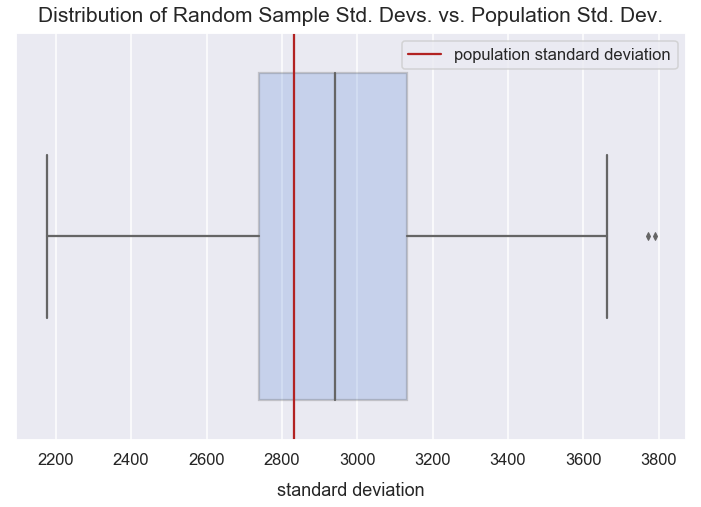

In [445]:
sns.boxplot(sample_standard_deviations, boxprops=dict(alpha=.3), color='cornflowerblue')
plt.axvline(x=pop_std_dev, label="population standard deviation", color='firebrick')
plt.title("Distribution of Random Sample Std. Devs. vs. Population Std. Dev.", y=1.011, fontsize=21)
plt.xlabel("standard deviation", labelpad=14)
plt.legend();

#### Calculate Standard Deviation of 500 Random Samples Using Population Standard Deviation Formula

Below, I perform nearly the same calculation as above. The only difference is that I set the NumPy `std()` method's argument of `ddof` to be 1 so the $n-1$ calculation is made in the sample standard deviation formula above.

In [424]:
sample_standard_deviations = []

for i in range(0, 500):
    random_sample_values = np.random.choice(mass_values, size=30, replace=False)
    sample_std_dev = np.std(random_sample_values, ddof=1)
    sample_standard_deviations.append(sample_std_dev)

#### Visualize Standard Deviation Values

The boxplot below compares the distribution of the 500 sample standard deviations (using the sample standard deviation formula) to the population standard deviation. The median of the sample standard deviations is nearly the same as the population standard deviation. This is a good signal that our method for calculating the sample standard deviations using Bessel's correction is fairly good at getting a sample standard deviation value that's similar to the population standard deviation value.

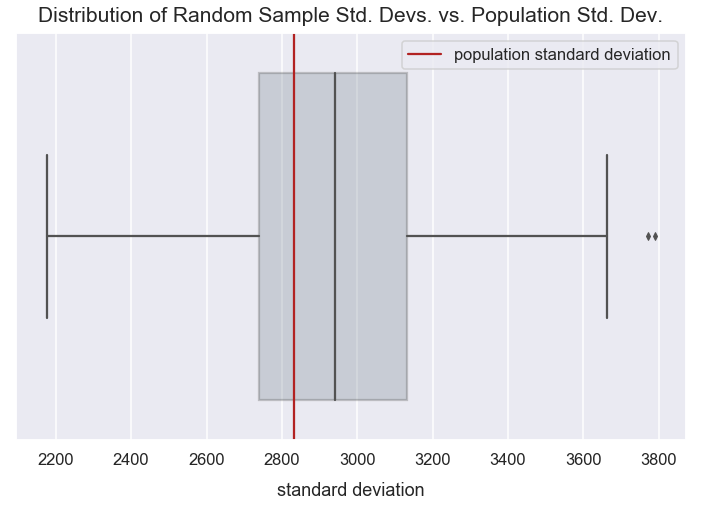

In [444]:
sns.boxplot(sample_standard_deviations, boxprops=dict(alpha=.3), color='lightslategray')
plt.axvline(x=pop_std_dev, label="population standard deviation", color='firebrick')
plt.title("Distribution of Random Sample Std. Devs. vs. Population Std. Dev.", y=1.011, fontsize=21)
plt.xlabel("standard deviation", labelpad=14)
plt.legend();

In conclusion, the sample standard deviation formula using Bessel's correction provides a *less biased* estimator of the population's standard deviation. There still is *some* bias, but less than if you use the population standard deviation formula for a sample.

### Exploring Bias in Population Standard Deviation Formula for Samples with Various Sample Sizes

Create empty DataFrame with columns `sample_size` and `standard_deviation`.

In [426]:
df = pd.DataFrame(data={'sample_size': [], 'standard_deviation': []})

For sample size values in range of 5 to 100 with a step of 10, I perform 500 simulations of sampling the size of values from `mass_values`. For each simulation, I calculate the standard deviation and store all those standard deviation values in the `df` DataFrame.

In [427]:
iterations_per_sample_size = 500
sample_size_range = range(5, 100, 10)

for sample_size in sample_size_range:
    sample_standard_deviations = []
    for i in range(0, iterations_per_sample_size):
        random_sample_values = np.random.choice(mass_values, size=sample_size, replace=False)
        sample_std_dev = np.std(random_sample_values)
        sample_standard_deviations.append(sample_std_dev)
    df2 = pd.DataFrame(data={'sample_size': [sample_size]*iterations_per_sample_size, 'standard_deviation': sample_standard_deviations})
    df = df.append(df2, ignore_index=True)

Prevew the first few rows of `df`.

In [428]:
df.head()

,sample_size,standard_deviation
0,5.0,3407.783929
1,5.0,1980.817541
2,5.0,1032.042658
3,5.0,3267.443921
4,5.0,2175.489702


Convert all the `sample_size` values from float to int data type.

In [429]:
df['sample_size'] = df['sample_size'].astype(int)

#### Visualize Standard Deviation Distributions of Various Sample Sizes Compared to Population Standard Deviation

The visualization below shows the distribution of standard deviation values for various sample sizes. As the sample size increases, there's decreased variability in the standard deviation values. Also, as the sample size increases, the median of the standard deviation values becomes closer to the population mean. 

For most small sample sizes, the median standard deviation is fairly far off from the population standard deviation. This indicates there's a slight bias in using the population standard deviation equation for samples.

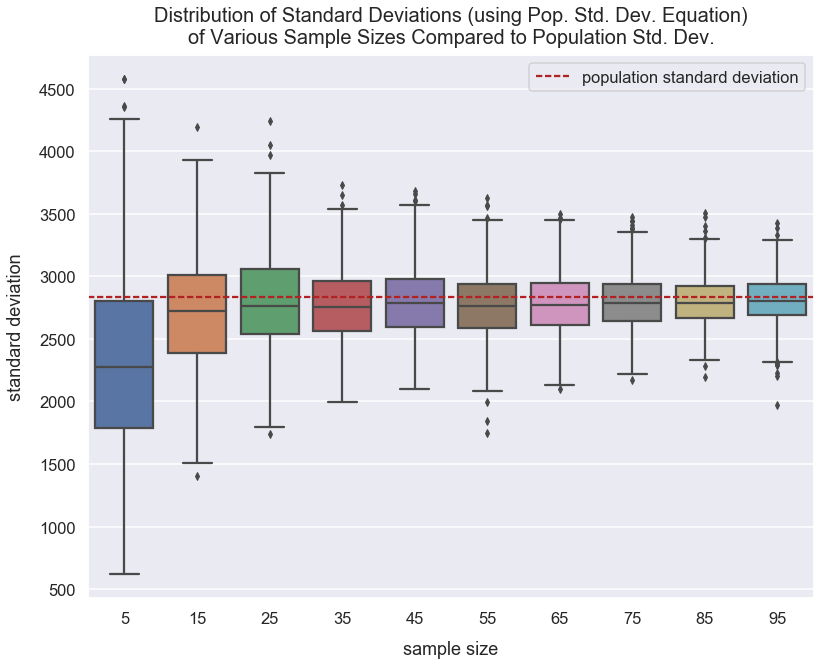

In [443]:
plt.figure(figsize=(13, 10))
sns.boxplot(x="sample_size", y="standard_deviation", data=df)
plt.title("Distribution of Standard Deviations (using Pop. Std. Dev. Equation)\nof Various Sample Sizes Compared to Population Std. Dev.", y=1.01, fontsize=20)
plt.xlabel("sample size", labelpad=14)
plt.ylabel("standard deviation", labelpad=14)
plt.axhline(y=pop_std_dev, label="population standard deviation", color='firebrick', linestyle='--')
plt.legend();

#### Visualize Median Standard Deviation Values of Various Sample Sizes Compared to Population Standard Deviation

This visualization below compares the median standard deviation value of various sample sizes compared to the population standard deviation. There's still bias in using small sample sizes and using the population standard deviation equation to calculate the standard deviations of samples. 

In [431]:
median_std_dev_of_same_size_samples = []

for sample_size in df['sample_size'].unique():
    median = df[df['sample_size']==sample_size]['standard_deviation'].median()
    median_std_dev_of_same_size_samples.append(median)

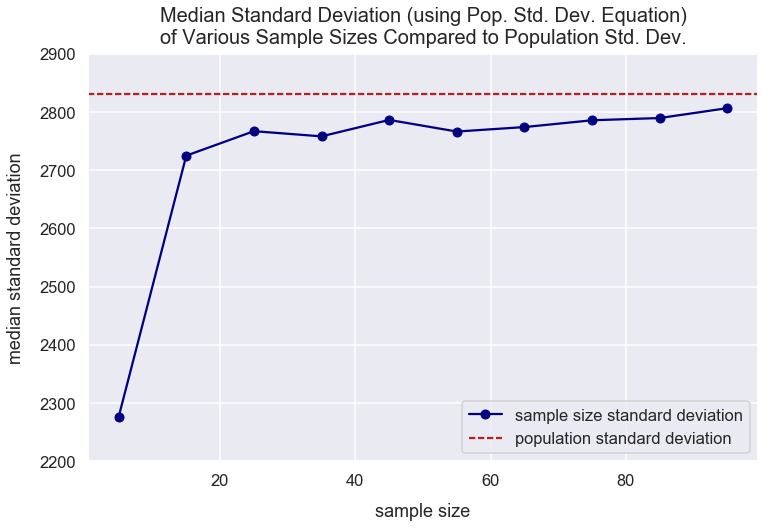

In [442]:
plt.plot(sample_size_range, median_std_dev_of_same_size_samples, label='sample size standard deviation', marker='o', color='navy')
plt.axhline(y=pop_std_dev, label="population standard deviation", color='firebrick', linestyle='--')
plt.title("Median Standard Deviation (using Pop. Std. Dev. Equation)\nof Various Sample Sizes Compared to Population Std. Dev.", y=1.01, fontsize=20)
plt.xlabel("sample size", labelpad=14)
plt.ylabel("median standard deviation", labelpad=14)
plt.ylim(2200, 2900)
plt.legend();

### Why $n-1$

The **sample standard deviation** equation is:

$$ s = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_{i}-\bar{x})^{2}} $$

Why $n-1$?

In the simulation below, I try out various values in place of the $1$ value in the $n-1$ component and examine the median sample standard deviation values.

First, I create an empty DataFrame with columns `degree_of_freedom` and `standard_deviation`.

In [433]:
df3 = pd.DataFrame(data={'degree_of_freedom': [], 'standard_deviation': []})

### compare how dof is equivalent to 1 in formula

In the NumPy `std()` method, there's an argument called `ddof` which means delta degrees of freedom. The divisor $n-1$ component in the equation above is the same as `n - ddof` for use in the `std()` method. By default, `ddof` is zero - the proper divisor for the population standard deviation equation. A `ddof` of 1 is equivalent to the $n-1$ componenet in the sample standard deviation equation.

With the code below, for degrees of freedom values from 0 to 6 with a step of 1, I perform 500 simulations of sampling 60 values from `mass_values`. For each simulation, I calculate the standard deviation value and store all those standard deviation values in the `df3` DataFrame.

In [434]:
np.random.seed(12)
iterations_per_degree_of_freedom = 500
dof_range = range(0, 7)

for degree_of_freedom in dof_range:
    sample_standard_deviations = []
    for i in range(0, iterations_per_degree_of_freedom):
        random_sample_values = np.random.choice(mass_values, size=60, replace=False)
        sample_std_dev = np.std(random_sample_values, ddof=degree_of_freedom)
        sample_standard_deviations.append(sample_std_dev)
    df4 = pd.DataFrame(data={'degree_of_freedom': [degree_of_freedom]*len(sample_standard_deviations), 'standard_deviation': sample_standard_deviations})
    df3 = df3.append(df4, ignore_index=True)

For each degree of freedom, I calculate its median standard deviation from the simulations above and store them in a list `median_std_dev_of_same_dof`.

In [435]:
median_std_dev_of_same_dof = []

for degree_of_freedom in df3['degree_of_freedom'].unique():
    median = df3[df3['degree_of_freedom']==degree_of_freedom]['standard_deviation'].median()
    median_std_dev_of_same_dof.append(median)

Convert all the `degree_of_freedom` values from float to int data type.

In [436]:
df3['degree_of_freedom'] = df3['degree_of_freedom'].astype(int)

This visualization below compares the median standard deviation value of various degree of freedoms used in the sample standard deviation equation compared to the population standard deviation. It's clear that at 1 degree of freedom, equivalent to $n-1$ our sample standard deviation is an unbiased estimator of the population standard deviation since the values are so close.

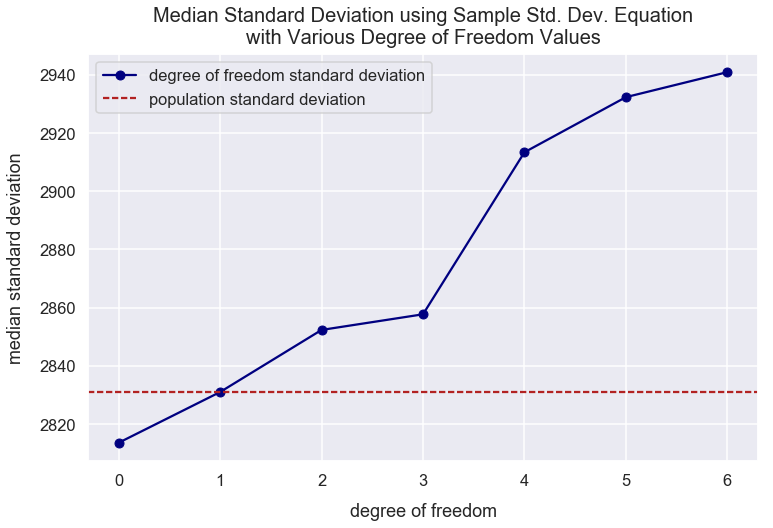

In [446]:
plt.plot(dof_range, median_std_dev_of_same_dof, label='degree of freedom standard deviation', marker='o', color='navy')
plt.axhline(y=pop_std_dev, label="population standard deviation", color='firebrick', linestyle='--')
plt.title("Median Standard Deviation using Sample Std. Dev. Equation\nwith Various Degree of Freedom Values", y=1.01, fontsize=20)
plt.xlabel("degree of freedom", labelpad=14)
plt.ylabel("median standard deviation", labelpad=14)
# plt.ylim(2200, 2900)
plt.legend();